## First simulate the easy} case:
## $y_1$ = x+$\eta_1$
## $y_2$ = x+$\eta_2$
## For a given x, generate many y's, look at (x-$x_{est}$)^2

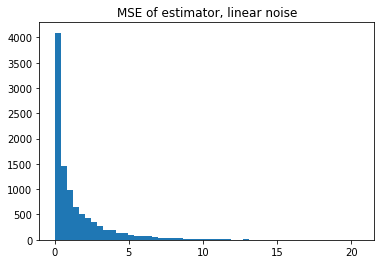

In [31]:
import numpy as np
import matplotlib.pyplot as plt
x = 10
sig1 = 2
sig2 = 5

samples = 10000

y1 = x+ sig1**(.5)*np.random.normal(size=samples)
y2 = x+ sig2**(.5)*np.random.normal(size=samples)

#plt.hist(y1,bins=50,stacked=True,normed=True)
#plt.show()
#plt.hist(y2,bins=50,stacked=True,normed=True)
#plt.show()
#a=plt.hist2d(y1,y2,bins=(20,20))

#estimator:
def ls(y1,y2,noise1,noise2):
    return (noise1*y2+noise2*y1)/(noise1+noise2)

a=plt.hist((x - ls(y1,y2,sig1,sig2))**2,bins=50)
plt.title("MSE of estimator, linear noise")

## Now say:
## $y_1 = e^{g_1}x+\eta_1$
## $y_2 = e^{g_2}x+\eta_2$

In [56]:
s1 = 50
s2 = 20

s1noise = s1**.5*np.random.normal(size=samples)
s2noise = s2**.5*np.random.normal(size=samples)

y1 = np.exp(s1noise)*x+ sig1**(.5)*np.random.normal(size=samples)
y2 = np.exp(s2noise)*x+ sig2**(.5)*np.random.normal(size=samples)

#plt.hist(y1,bins=100,log=True)
#a=plt.hist((x - ls(y1,y2,noise1,noise2))**2,bins=50,log=True)

def lin_est(y1,y2,sig1,sig2):
    return (y1*sig2+y2*sig1)/(sig1+sig2)

def mult_est(y1,y2,s1,s2):
    return (np.log(abs(y1))*s2+np.log(abs(y2))*s1)/(s1+s2)

#def comb_est(y1,y2,s1,s2,sig1,sig2):
#    return (sig1*y2+sig2*y1 + np.log(abs(y1))*s2+np.log(abs(y2))*s1)/(s1+s2+sig1+sig2)

def comb_est(y1,y2,s1,s2,sig1,sig2):
    return 1/(1+np.exp(-(sig1+sig2)/(s1+s2)))*lin_est(y1,y2,sig1,sig2)  +  1/(1+np.exp(-(s1+s2)/(sig1+sig2)))*mult_est(y1,y2,s1,s2)
    #return (sig1+sig2)/(sig1+sig2+s1+s2)**2*lin_est(y1,y2,sig1,sig2)  +  (s1+s2)/(sig1+sig2+s1+s2)**2*mult_est(y1,y2,s1,s2)
    #return (sig1*y2+sig2*y1 + np.log(abs(y1))*s2+np.log(abs(y2))*s1)/(s1+s2+sig1+sig2)
                                                                             
print( np.mean((x-lin_est(y1,y2,sig1,sig2) )**2) , np.mean(lin_est(y1,y2,sig1,sig2)))
#plt.hist(x-lin_est(y1,y2,sig1,sig2))
print( np.mean((x-mult_est(y1,y2,s1,s2) )**2) ,np.mean(mult_est(y1,y2,s1,s2)))
print( np.mean((x-comb_est(y1,y2,s1,s2,sig1,sig2) )**2), np.mean(comb_est(y1,y2,s1,s2,sig1,sig2) ))


7.062054742824071e+19 175398474.0422368
51.13982270928477 3.421139229679196
1.9463245135477002e+19 92080551.80872333


## Clearly this is a bad estimator